In [1]:
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
from galpy.potential import MWPotential2014
import galpy 
import soda
from galpy import orbit

from astropy import units

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


In [2]:
disk_params = [6.8E10, 3., 0.28]
# It's not clear that the bulge of the MWPotential2014 is a Hernquist
bulge_params = [0.5E10, 0.6]
host_model = ['NFW', 0.8E12, 245, 15.3]
t, pos, vel = soda.leapfrog.integrate_mw(4,  [10, 0, 0], [0, 240, 0], host_model=host_model,
                                         dt=0.0005, ac=0)

In [3]:
from galpy.potential import NFWPotential
from astropy import units

In [4]:
soda.cosmotools.Dvir(0)
halo_pot = NFWPotential(mvir=0.8, conc=15.3, Om=0.27, overdens=359.29, H=69.999992)

In [5]:
R = 10
vR = 0
vT = -240
z = 0
vZ = 0


op= orbit.Orbit(vxvv=[R*units.kpc,vR*units.km/units.s,
                      vT*units.km/units.s,z*units.kpc,
                      vZ*units.km/units.s,0.0*units.deg])

ts= numpy.linspace(0, 4.,10000)*units.Gyr
op.integrate(ts,halo_pot)

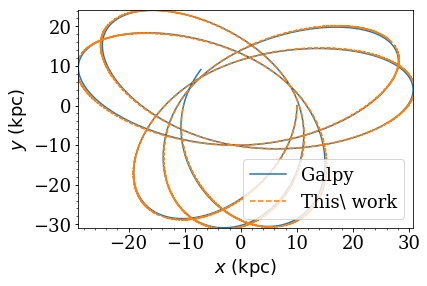

In [18]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)
plt.figsize=(5,5)

op.plot(d1='x',d2='y', label='Galpy')
plot(pos[:,0], pos[:,1], ls='--', label='This\ work')
legend()
savefig('galpy_test.pdf', dpi=300, bbox_inches='tight')

## What the difference might be:

1. How Galpy derive the potential, or the integrator!